In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering

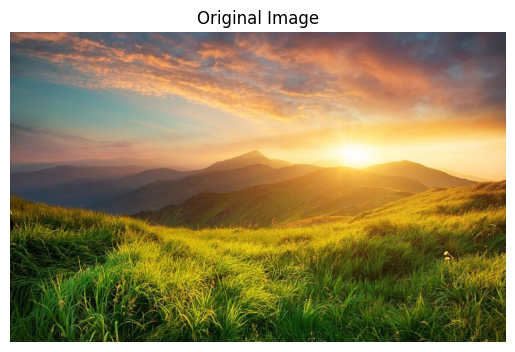

In [2]:
image = cv2.imread("C://Users//Ritanya//Downloads//image_dm.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()


In [8]:
pixels = image.reshape((-1, 3))
pixels = np.float32(pixels)

K-Means

In [4]:
def compress_kmeans(pixels, k, original_shape):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    
    centroids = kmeans.cluster_centers_  
    labels = kmeans.labels_              
    
    compressed_pixels = centroids[labels]
    
    compressed_image = compressed_pixels.reshape(original_shape).astype(np.uint8)
    return compressed_image

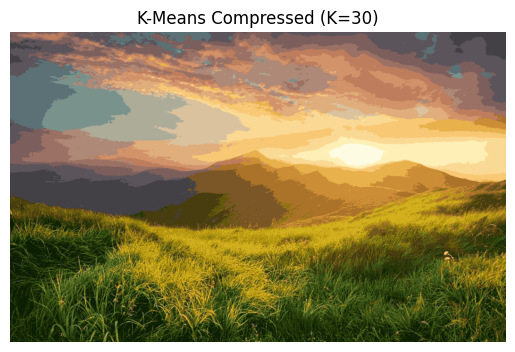

In [6]:
k = 30

kmeans_image = compress_kmeans(pixels, k, image.shape)

plt.imshow(kmeans_image)
plt.title(f"K-Means Compressed (K={k})")
plt.axis("off")
plt.show()

Hierarchical Clustering

In [11]:
def compress_hierarchical(pixels, k, original_shape):
    clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = clustering.fit_predict(pixels)

    compressed_pixels = np.zeros_like(pixels)
    
    for cluster_id in range(k):
        cluster_points = pixels[labels == cluster_id]
        mean_color = cluster_points.mean(axis=0)
        compressed_pixels[labels == cluster_id] = mean_color
    
    compressed_image = compressed_pixels.reshape(original_shape).astype(np.uint8)
    return compressed_image


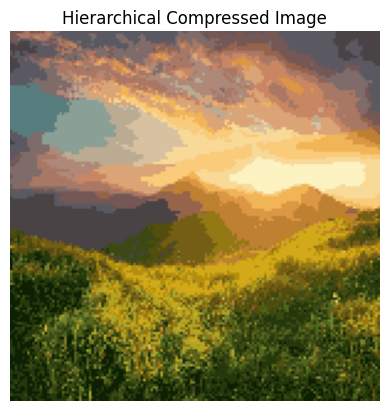

In [15]:
small_image = cv2.resize(image, (150, 150))
small_pixels = small_image.reshape((-1, 3)).astype(np.float32)

hier_image = compress_hierarchical(small_pixels, k=30, original_shape=small_image.shape)

plt.imshow(hier_image)
plt.title("Hierarchical Compressed Image")
plt.axis("off")
plt.show()